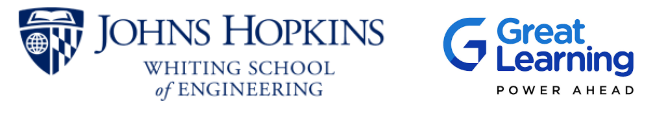

<font size=10>**Classification, Content Generation and Summarization with Gen AI**</font>

<font size=6>**AI-Assisted Aspect-Based Sentiment Classification System**</font>

# **Business Problem - Improving Guest Experience with Aspect-Based Sentiment Analysis**

LuxeHaven, a rapidly expanding luxury resort chain, faces challenges in understanding customer sentiment across different aspects of their experiences. While overall ratings provide a broad picture, they fail to capture granular insights into key areas such as food quality, service, and ambiance. This lack of detailed feedback makes it difficult for management to take targeted actions to enhance customer satisfaction and loyalty.

Traditional sentiment analysis methods often provide a general positive or negative sentiment for a review, without distinguishing between different aspects. For instance, a customer might praise the food but criticize the Service, yet a generic sentiment score would not reveal this nuance. LuxeHaven struggles to prioritize operational improvements and deliver a consistently high-quality dining experience without a structured approach to understanding customer sentiment.

LuxeHaven aims to enhance business insights by implementing Aspect-Based Sentiment Analysis (ABSA) using Prompt Engineering techniques. The system will generate actionable insights by analyzing sentiment across specific aspects, enabling restaurant managers to make informed decisions. This approach will help identify strengths and address weaknesses, ultimately improving the overall customer experience.


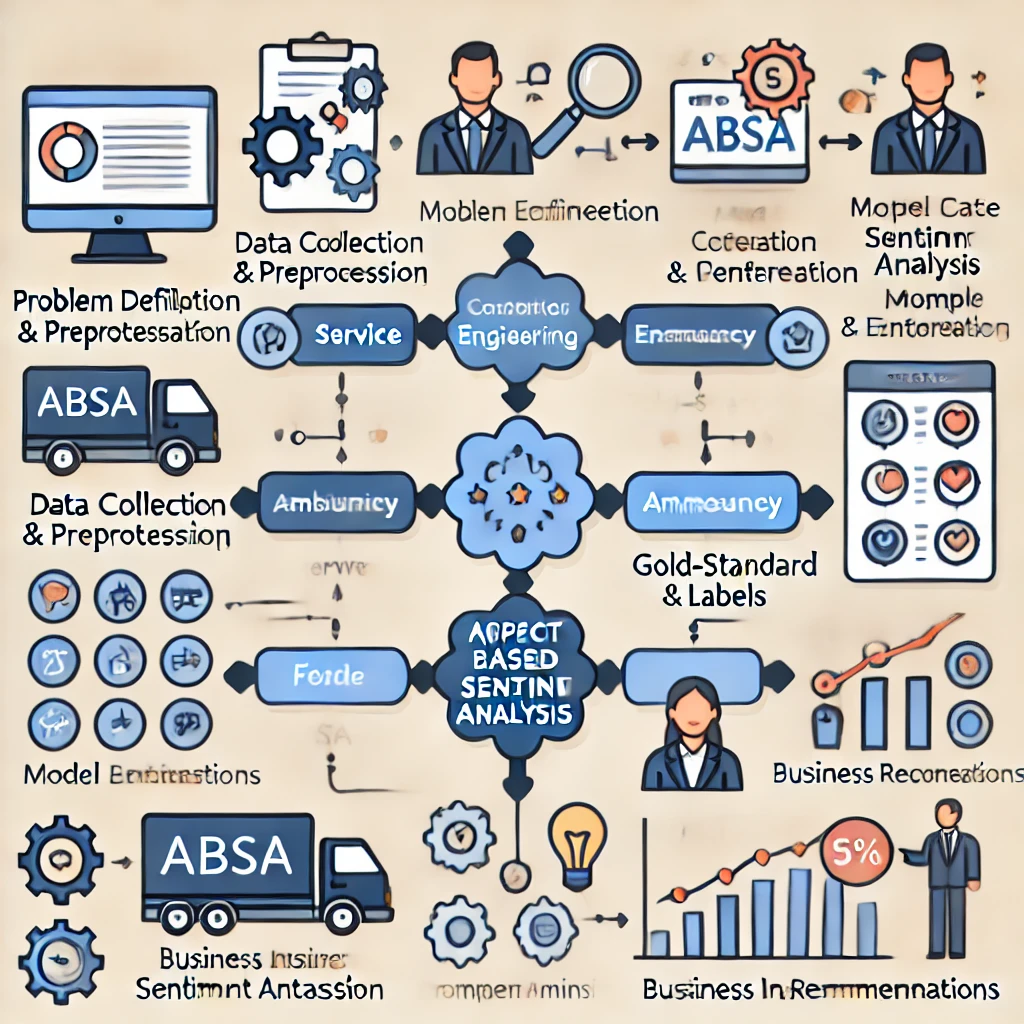

##**Key Business Outcomes**

✅ **Targeted Service Improvements** – Identify and address specific issues related to food, service, and ambience to enhance the overall dining experience.

✅ **Better Customer Retention** – Proactively resolve negative experiences and reinforce positive aspects to increase repeat customers.

✅ **Data-Driven Decision Making** – Use AI-powered insights to improve menu offerings, staff training, and restaurant ambience.

## **Objective**
The primary objective is to develop an **AI-powered differential Aspect-Based Sentiment Analysis system** that:

🔹 **Extracts aspect-specific sentiments** from customer reviews (e.g., food: positive, service: negative, ambience: positive).

🔹 **Provides actionable insights** for restaurant managers to optimize operations and customer service.

🔹 **Improves the customer experience** by identifying key pain points and strengths across multiple locations.

🔹 **Enhances marketing and customer engagement** by leveraging data-driven sentiment insights.


## <font color='red'>**Solution Approach**</font>

<font color='blue'>**1. Environment Setup & Installation**</font>
* Install required libraries, including openai, pandas, and sklearn.

<font color='blue'>**2. Model Loading & Configuration**</font>
* Configure OpenAI API using Open AI key.
* Load GPT-4o-mini using Open AI API.

<font color='blue'>**3. Data Loading & Preprocessing**</font>
* Load the restaurant reviews dataset.
* Shuffle and split data into:
   Example Reviews (20 samples)
   Gold-Standard Reviews (20 samples)
   Validation Reviews (remaining data).
* Convert gold-standard examples into JSON format for structured reference.

<font color='blue'>**4. Aspect-Based Sentiment Analysis (ABSA) using GPT-4o-mini**</font>
* Construct **dynamic prompts** to extract sentiment for specific aspects:
   **Ambience, Service, Food**
* Call **OpenAI’s Chat Completion** (gpt-4o-mini) to generate aspect-based sentiments.
* Extract predicted sentiments from the LLM response.
* Convert responses and aspects into a dictionary format.

<font color='blue'>**5. Evaluation & Performance Metrics**</font>
* Generate **combined_accuracy** function to calculate model predictions against gold-standard ground truth (**Aspects**)
* Compare model predictions against gold-standard label.
* Compute combined accuracy to assess aspect-based sentiment classification accuracy.

<font color='blue'>**6. Results & Insights**</font>
* Summarize **key findings**, including model accuracy trends.
* Provides **actionable insights** for restaurant managers to optimize operations and customer service.

## <font color='red'>**Solution Workflow**</font>

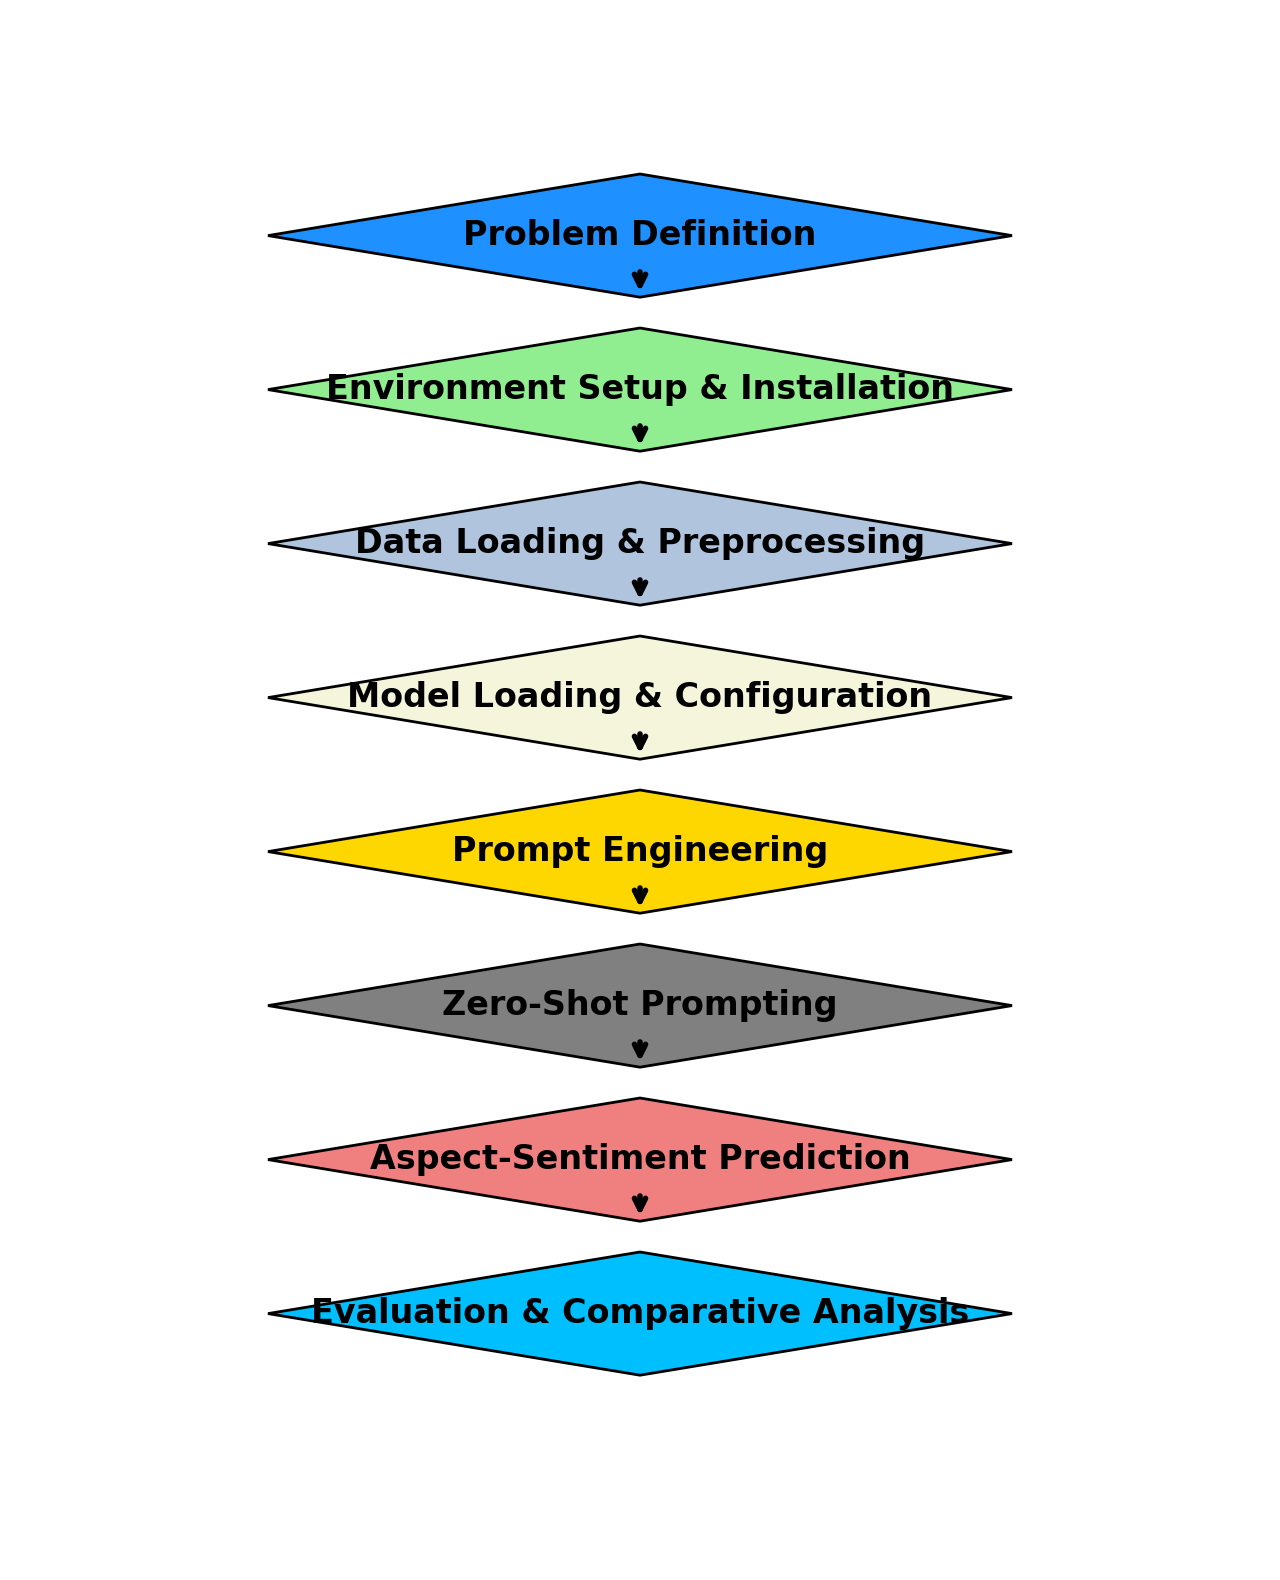

# **<font color='blue'>Environment Setup & Installation</font>**

This section sets up the environment and installs the necessary dependencies for the Aspect-Based Sentiment Analysis (ABSA) task.
This section ensures that OpenAI's API is installed and available for text processing and loads necessary libraries for text handling, aspect-based sentiment analysis, and evaluation.

**Install OpenAI Library:**
Below command installs the OpenAI Python package to interact with OpenAI's API (likely for GPT-based text processing).

In [1]:
!pip install openai

**Import Required Libraries:** This section imports all necessary lilibrariesbaries.

**os** → Used for handling environment variables (e.g., OpenAI API key configuration).

**OpenAI** → Allows interaction with OpenAI's API for text generation.

**pandas** → Used for loading, processing, and analyzing structured tabular data.

**random** → Generates random values (could be used for sampling data).

**json** → Handles JSON-formatted data (potentially for API responses).

**tqdm** → Provides progress bars for loops (useful for tracking execution progress).

**re** → Used for text processing and pattern matching (regular expressions).Re

In [1]:
import os
from openai import OpenAI

import pandas as pd
import random
import json
from tqdm import tqdm
import re
from sklearn.metrics import f1_score

###**<font color=blue> Upload Dataset and config.json in colab</font>**

Step 1: First, click on the icon highlighted in red.

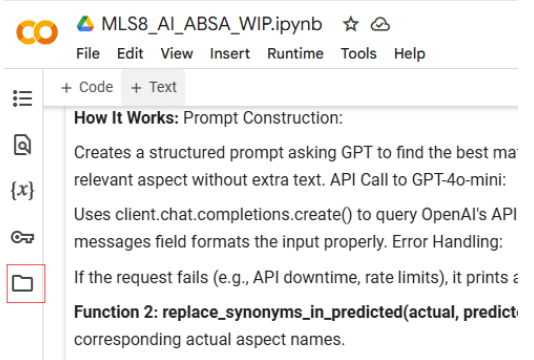

Step 2: Click on the next icon highlighted in red.



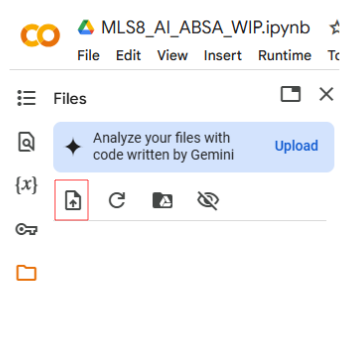

Step 3: Select config.json and the dataset file from the Downloads and click on open highlighted in red box.

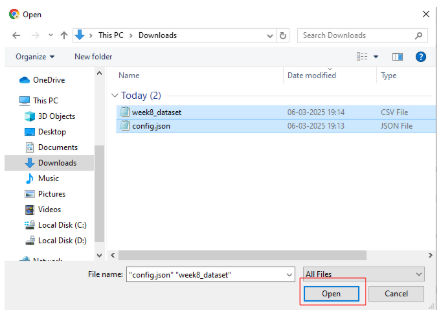

Step 4: A warning message will appear—click OK to proceed.

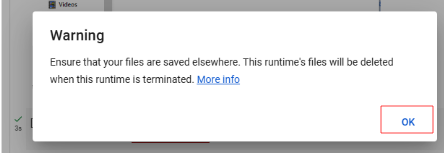

# **<font color='blue'>Model Loading</font>**

✅ Read Json file containing OpenAI credentials.

✅ Configures OpenAI API credentials for secure access.

✅ Initializes OpenAI's client to send API requests.


###**<font color=blue>Configures OpenAI API credentials for secure access**:
**Call json file containing API credentials** for accessing the OpenAI API.
**Stores API credentials** for accessing the OpenAI API.

**OPENAI_API_BASE** is set to an endpoint as this instance of OpenAI API is for (Great Learning Internal Use). This is not needed if you are using your own Open AI key.

The **API key** is stored in environment variables to avoid hardcoding it in multiple places.

###**Step to find path of your config.json file**

Step 1: Hover over the config.json file, then click on the three dots highlighted in the red box.

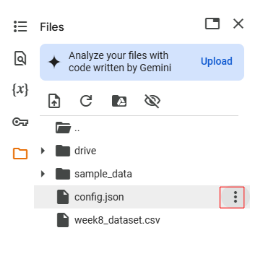

Step 2: Select copy path. It will copy path of your json file.

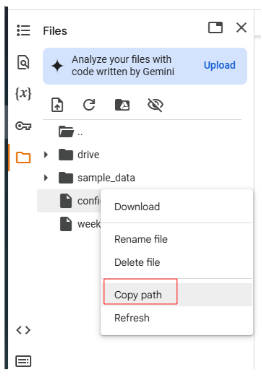

In [8]:
file_name = 'config.json'  #paste path here
with open(file_name, 'r') as file:
    config = json.load(file)
    API_KEY = config.get("API_KEY") # Loading the API Key
    OPENAI_API_BASE = config.get("OPENAI_API_BASE") # Loading the API Base Url

In [9]:
# Importing the GPT-4 LLM and setting it up
os.environ['OPENAI_API_KEY']= API_KEY
os.environ["OPENAI_API_BASE"] = OPENAI_API_BASE ;

###**Initializes OpenAI's client to send API requests.**

Creates an **OpenAI client** to interact with the model.

Uses environment variables to securely fetch API credentials.

In [10]:
client = OpenAI(
    api_key=os.environ.get("OPENAI_API_KEY"),
    base_url=os.environ.get("OPENAI_API_BASE")
)

### **<font color='blue'>Output Testing</font>**


✅ Tests GPT-4o-mini’s response to a basic input.

✅ Prepares a prompt and retrieves a model-generated response.

###**Tests GPT-4o-mini’s response to a basic input.**

Sends a message to the **gpt-4o-mini** model using **OpenAI’s chat API**.

Defines a user message, specifying the role as "user" and providing input content.

Stores the model-generated response in chat_completion.

In [11]:
chat_completion = client.chat.completions.create(
    messages=[
        {
            "role": "user",
            "content": "Say this is a test",
        }
    ],
    model="gpt-4o-mini",

)

###**Prepares a prompt and retrieves a model-generated response**

Defining a simple Prompt

In [12]:
prompt="How are you?"

###**Generating a Response Using GPT-4o-mini**
Sends the custom prompt ("How are you?") to the GPT model.

Uses temperature=0, ensuring deterministic responses (same output for the same input).

The response is stored in the response variable.

In [13]:
response = client.chat.completions.create(
    model="gpt-4o-mini",
    temperature=0,
    messages=[
        {
            "role": "user",
            "content": [
                {"type": "text", "text": prompt},
            ],
        }
    ],
)

response.choices[0].message.content

"I'm just a computer program, so I don't have feelings, but I'm here and ready to help you! How can I assist you today?"

In [14]:
print(response.choices[0].message.content)

I'm just a computer program, so I don't have feelings, but I'm here and ready to help you! How can I assist you today?


# **<font color='blue'>Aspect Based Sentiment Classification</font>**

###**<font color=blue>Load & Prepare Data</font>**

**Load** dataset containing customer reviews.

Randomly shuffles the dataset for unbiased analysis.

**Splits data into three subsets:**

**Example reviews (20)** → To be used in few-shot prompt.

**Gold reviews (20)** → To be used for evaluation of AI-assistant output on Golden examples (Typically, golden examples are carefully chosen to test LLM limitations, particularly in challenging scenarios where failure is likely. However, in the absence of such critical cases, we are selecting a sample at random.)

**Reviews** → To be used for generating predictions and derive valuable business insights.

###**<font color=blue>Load Dataset**
Reads a CSV file containing customer reviews into a Pandas DataFrame (data) and display the dataset.

In [16]:
data =pd.read_csv("week8_dataset.csv")
data

,Hotel,Review,Aspects
0,The Royal Orchid,The ambience of the hotel was breathtaking wit...,"{Ambience: Positive, Service: Negative, Food: ..."
1,Ocean View Resort,I loved the serene ocean view and the cozy dec...,"{Ambience: Positive, Service: Negative, Food: ..."
2,Mountain Bliss,"The ambience was a bit dull, with poorly maint...","{Ambience: Negative, Service: Positive, Food: ..."
3,Urban Escape,The interiors and vibe of the hotel were fanta...,"{Ambience: Positive, Service: Positive, Food: ..."
4,City Comfort Inn,"The hotel was neat and clean, but the ambience...","{Ambience: Negative, Service: Negative, Food: ..."
...,...,...,...
115,Highland View Resort,Highland View Resort didn't impress with its a...,"{Ambience: Negative, Service: Positive, Food: ..."
116,Coastal Breeze Inn,Coastal Breeze Inn was not as great as anticip...,"{Ambience: Negative, Service: Positive, Food: ..."
117,Mountain Peak Lodge,Mountain Peak Lodge fell short in terms of amb...,"{Ambience: Negative, Service: Positive, Food: ..."
118,Ocean Breeze Resort,Ocean Breeze Resort didn't meet our expectatio...,"{Ambience: Negative, Service: Positive, Food: ..."


###**<font color=blue>Shuffle Dataset and Split Dataset**
Randomly shuffles all rows (frac=1 keeps all data).

random_state=42 ensures reproducibility.

reset_index(drop=True) removes the old index and resets it.

Splits the dataset into:

**example_reviews_df:** First 20 rows to be used in few-shot prompt.

**gold_reviews_df:** Next 30 rows to be used as gold examples for prompt evaluation.

**reviews_df:** Remaining rows to be used for prediction and generate business insights.

In [17]:
# Randomly shuffle the DataFrame rows
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

# Split into three parts
example_reviews_df = data.iloc[:20]
gold_examples_df = data.iloc[20:50]
reviews_df = data.iloc[50:]

# Select a random state if there's a column named 'state'
if 'state' in reviews_df.columns:
    random_state = random.choice(data['state'].unique())
    print(f"Random State: {random_state}")

###**<font color=blue>Extract & Format Gold Examples**

Select the Review and Aspects columns from gold reviews.

Converts them to JSON format for structured processing.

In [18]:
# Convert gold examples to JSON
columns_to_select = ['Review', 'Aspects']
gold_examples_json = gold_examples_df[columns_to_select].to_json(orient='records')

# Print the first record from the JSON
print(json.loads(gold_examples_json)[0])

{'Review': 'Seaside Resort offers a breathtaking ocean view that makes it impossible not to relax. The ambience is perfect, with gentle waves and a cool sea breeze. The staff were exceptionally welcoming and attentive, ensuring we felt special throughout our stay. The food was divine! Every dish, from the seafood to the desserts, was flavorful and well-prepared. I truly enjoyed every aspect of my stay here and will definitely return for more of the excellent service and delicious food.', 'Aspects': '{Ambience: Positive, Service: Positive, Food: Positive}'}


In [19]:
gold_examples_df

,Hotel,Review,Aspects
20,Seaside Resort,Seaside Resort offers a breathtaking ocean vie...,"{Ambience: Positive, Service: Positive, Food: ..."
21,Sunset Breeze Hotel,This was one of the worst hotel experiences I’...,"{Ambience: Negative, Service: Negative, Food: ..."
22,Sapphire Lagoon Resort,The stunning lagoon view and beautifully lit i...,"{Ambience: Positive, Service: Positive, Food: ..."
23,Sunset Ridge Resort,Sunset Ridge Resort is absolutely magical at s...,"{Ambience: Positive, Service: Negative, Food: ..."
24,Sapphire Isles Resort,A mixed bag of experiences. The resort has a b...,"{Ambience: Positive, Service: Negative, Food: ..."
25,The Urban Nest,This place truly felt like a hidden oasis in t...,"{Ambience: Positive, Service: Negative, Food: ..."
26,Blue Lagoon Retreat,The hotel had an otherworldly charm—the lagoon...,"{Ambience: Positive, Service: Negative, Food: ..."
27,Woodland Lodge,Woodland Lodge had an off-putting ambiance; th...,"{Ambience: Negative, Service: Positive, Food: ..."
28,Golden Sands Resort,Golden Sands Resort is the perfect beach getaw...,"{Ambience: Positive, Service: Positive, Food: ..."
29,Valley View Lodge,Valley View Lodge was a bit of a mixed experie...,"{Ambience: Positive, Service: Negative, Food: ..."


In [20]:
gold_examples = (
        gold_examples_df.loc[:, columns_to_select]
                                     .sample(10, random_state=40) #<- ensures that gold examples are the same for every session
                                     .to_json(orient='records')
)

###**<font color=blue>Devise Prompt**

####**<font color=blue>Zero-shot prompting**

In [21]:
user_message_template = """{review}"""

In [22]:
gold_examples_df

,Hotel,Review,Aspects
20,Seaside Resort,Seaside Resort offers a breathtaking ocean vie...,"{Ambience: Positive, Service: Positive, Food: ..."
21,Sunset Breeze Hotel,This was one of the worst hotel experiences I’...,"{Ambience: Negative, Service: Negative, Food: ..."
22,Sapphire Lagoon Resort,The stunning lagoon view and beautifully lit i...,"{Ambience: Positive, Service: Positive, Food: ..."
23,Sunset Ridge Resort,Sunset Ridge Resort is absolutely magical at s...,"{Ambience: Positive, Service: Negative, Food: ..."
24,Sapphire Isles Resort,A mixed bag of experiences. The resort has a b...,"{Ambience: Positive, Service: Negative, Food: ..."
25,The Urban Nest,This place truly felt like a hidden oasis in t...,"{Ambience: Positive, Service: Negative, Food: ..."
26,Blue Lagoon Retreat,The hotel had an otherworldly charm—the lagoon...,"{Ambience: Positive, Service: Negative, Food: ..."
27,Woodland Lodge,Woodland Lodge had an off-putting ambiance; th...,"{Ambience: Negative, Service: Positive, Food: ..."
28,Golden Sands Resort,Golden Sands Resort is the perfect beach getaw...,"{Ambience: Positive, Service: Positive, Food: ..."
29,Valley View Lodge,Valley View Lodge was a bit of a mixed experie...,"{Ambience: Positive, Service: Negative, Food: ..."


In [28]:
def generate_llm_response( system_message, input_text , temp ):

    # Combine user_prompt and system_message to create the prompt
    prompt = f"[INST]{system_message}\n{input_text}[/INST]"

    response = client.chat.completions.create(
        model="gpt-4o-mini",
        temperature=temp,
        messages=[
            {
                "role": "user",
                "content": [
                    {"type": "text", "text": prompt},
                ],
            }
        ],
    )

    # Extract and return the response text
    response_text = response.choices[0].message.content
    return response_text

In [24]:
zero_shot_system_message = """
<<SYS>>
Perform aspect based sentiment analysis on customer reviews presented in the input delimited by triple backticks, that is, ```.

For each review presented as input:
- You need to read firstly the review carefully and based on the review, identify the aspects and sentiment for each of the aspects.
- There are 3 aspects for each of teh review: Ambience, Service, and Food
- You will need to assign a sentiment polarity for each aspect of the review , it should only be 'Positive' or 'Negative' , nothing else is acceptable .


Based on the product_type identified , give output only in the below format :
{ Ambience : ... , Service : ... , Food : ... }

- Here '...' represent the sentiment polarity ( Positive or Negative ).
- Aspects mentioned for each review are fixed and no aspect should be added or deleted
- Stricltly give output in above format. If any other format , then regenerate the output to the above mentioned format
- Do not explain your answer
now read the review :

<</SYS>>
"""

In [25]:
input_text = """
The ambience of the hotel was breathtaking with beautiful interiors and great lighting. However, the service was painfully slow and unresponsive. The food tasted amazing but arrived cold, which was disappointing.
"""

In [29]:
response = generate_llm_response( zero_shot_system_message , input_text , 0.1 )

In [30]:
response

'{ Ambience : Positive , Service : Negative , Food : Negative }'

###**<font color=blue>Measuring prompt performance**

We will first generate the response for gold_examples

In [31]:
sample_reviews = gold_examples_df.Review.values

In [32]:
sentiment_predictions=[]

In [33]:
for sample_review in tqdm(sample_reviews):
    try:
        sentiment_predictions.append(generate_llm_response( zero_shot_system_message , sample_review , 0.1 ))
    except Exception as e:
        print(e)
        sentiment_predictions.append("")

100%|██████████| 30/30 [00:36<00:00,  1.23s/it]


In [34]:
gold_examples_df.loc[:, "sentiment_prediction"] = sentiment_predictions

/tmp/ipython-input-922952389.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gold_examples_df.loc[:, "sentiment_prediction"] = sentiment_predictions


In [35]:
gold_examples_df

,Hotel,Review,Aspects,sentiment_prediction
20,Seaside Resort,Seaside Resort offers a breathtaking ocean vie...,"{Ambience: Positive, Service: Positive, Food: ...","{ Ambience : Positive , Service : Positive , F..."
21,Sunset Breeze Hotel,This was one of the worst hotel experiences I’...,"{Ambience: Negative, Service: Negative, Food: ...","{ Ambience : Negative , Service : Negative , F..."
22,Sapphire Lagoon Resort,The stunning lagoon view and beautifully lit i...,"{Ambience: Positive, Service: Positive, Food: ...","{ Ambience : Positive , Service : Positive , F..."
23,Sunset Ridge Resort,Sunset Ridge Resort is absolutely magical at s...,"{Ambience: Positive, Service: Negative, Food: ...","{ Ambience : Positive , Service : Negative , F..."
24,Sapphire Isles Resort,A mixed bag of experiences. The resort has a b...,"{Ambience: Positive, Service: Negative, Food: ...","{ Ambience : Positive , Service : Negative , F..."
25,The Urban Nest,This place truly felt like a hidden oasis in t...,"{Ambience: Positive, Service: Negative, Food: ...","{ Ambience : Positive , Service : Negative , F..."
26,Blue Lagoon Retreat,The hotel had an otherworldly charm—the lagoon...,"{Ambience: Positive, Service: Negative, Food: ...","{ Ambience : Positive , Service : Negative , F..."
27,Woodland Lodge,Woodland Lodge had an off-putting ambiance; th...,"{Ambience: Negative, Service: Positive, Food: ...","{ Ambience : Negative , Service : Positive , F..."
28,Golden Sands Resort,Golden Sands Resort is the perfect beach getaw...,"{Ambience: Positive, Service: Positive, Food: ...","{ Ambience : Positive , Service : Positive , F..."
29,Valley View Lodge,Valley View Lodge was a bit of a mixed experie...,"{Ambience: Positive, Service: Negative, Food: ...","{ Ambience : Positive , Service : Negative , F..."


**We will now convert the actual and predicted aspect-based sentiments into dictionaries for easier calculations. This transformation will allow for efficient comparison and analysis of aspects and their corresponding sentiments.**

The function extract_product_sentiment_dict(text) extracts aspect-based sentiment data from a text containing a {...} structure and converts it into a Python dictionary.

It first searches for content inside {} using a regular expression (re.search(r'{(.*?)}', str(text))). If no match is found, the function returns an empty dictionary {}. If a match is found, it extracts the inner content, removes unnecessary spaces, and splits it by commas to get individual aspect-sentiment pairs.

Each pair is then split by ":", ensuring it has exactly two elements (aspect and sentiment). The function stores these key-value pairs in a dictionary and returns the final structured aspect-based sentiment dictionary.

In [36]:
def extract_product_sentiment_dict(text):
    match = re.search(r'\{(.*?)\}', str(text))  # Extract content inside {}
    if not match:
        return {}  # Return an empty dictionary if no match is found

    content = match.group(1).strip()  # Extract content
    pairs = [pair.strip().lower() for pair in content.split(',')]  # Split by commas

    product_sentiment_dict = {}

    for pair in pairs:
        parts = [p.strip() for p in pair.split(':')]  # Split each pair by ':'
        if len(parts) == 2:
            product_sentiment_dict[parts[0]] = parts[1]  # Store as key-value pair

    return product_sentiment_dict

In [37]:
# Apply the functions to each row in the DataFrame and generate a column having aspect and classification dictionary for predicted sentiments
gold_examples_df.loc[:,'predicted_product_sentiment_dic'] = gold_examples_df['sentiment_prediction'].apply(extract_product_sentiment_dict)

/tmp/ipython-input-2856413663.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gold_examples_df.loc[:,'predicted_product_sentiment_dic'] = gold_examples_df['sentiment_prediction'].apply(extract_product_sentiment_dict)


In [38]:
# Apply the functions to each row in the DataFrame and generate a column having aspect and classification dictionary for actual sentiments
gold_examples_df.loc[:,'actual_product_sentiment_dic'] = gold_examples_df['Aspects'].apply(extract_product_sentiment_dict)

/tmp/ipython-input-3123510774.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gold_examples_df.loc[:,'actual_product_sentiment_dic'] = gold_examples_df['Aspects'].apply(extract_product_sentiment_dict)


In [39]:
gold_examples_df

,Hotel,Review,Aspects,sentiment_prediction,predicted_product_sentiment_dic,actual_product_sentiment_dic
20,Seaside Resort,Seaside Resort offers a breathtaking ocean vie...,"{Ambience: Positive, Service: Positive, Food: ...","{ Ambience : Positive , Service : Positive , F...","{'ambience': 'positive', 'service': 'positive'...","{'ambience': 'positive', 'service': 'positive'..."
21,Sunset Breeze Hotel,This was one of the worst hotel experiences I’...,"{Ambience: Negative, Service: Negative, Food: ...","{ Ambience : Negative , Service : Negative , F...","{'ambience': 'negative', 'service': 'negative'...","{'ambience': 'negative', 'service': 'negative'..."
22,Sapphire Lagoon Resort,The stunning lagoon view and beautifully lit i...,"{Ambience: Positive, Service: Positive, Food: ...","{ Ambience : Positive , Service : Positive , F...","{'ambience': 'positive', 'service': 'positive'...","{'ambience': 'positive', 'service': 'positive'..."
23,Sunset Ridge Resort,Sunset Ridge Resort is absolutely magical at s...,"{Ambience: Positive, Service: Negative, Food: ...","{ Ambience : Positive , Service : Negative , F...","{'ambience': 'positive', 'service': 'negative'...","{'ambience': 'positive', 'service': 'negative'..."
24,Sapphire Isles Resort,A mixed bag of experiences. The resort has a b...,"{Ambience: Positive, Service: Negative, Food: ...","{ Ambience : Positive , Service : Negative , F...","{'ambience': 'positive', 'service': 'negative'...","{'ambience': 'positive', 'service': 'negative'..."
25,The Urban Nest,This place truly felt like a hidden oasis in t...,"{Ambience: Positive, Service: Negative, Food: ...","{ Ambience : Positive , Service : Negative , F...","{'ambience': 'positive', 'service': 'negative'...","{'ambience': 'positive', 'service': 'negative'..."
26,Blue Lagoon Retreat,The hotel had an otherworldly charm—the lagoon...,"{Ambience: Positive, Service: Negative, Food: ...","{ Ambience : Positive , Service : Negative , F...","{'ambience': 'positive', 'service': 'negative'...","{'ambience': 'positive', 'service': 'negative'..."
27,Woodland Lodge,Woodland Lodge had an off-putting ambiance; th...,"{Ambience: Negative, Service: Positive, Food: ...","{ Ambience : Negative , Service : Positive , F...","{'ambience': 'negative', 'service': 'positive'...","{'ambience': 'negative', 'service': 'positive'..."
28,Golden Sands Resort,Golden Sands Resort is the perfect beach getaw...,"{Ambience: Positive, Service: Positive, Food: ...","{ Ambience : Positive , Service : Positive , F...","{'ambience': 'positive', 'service': 'positive'...","{'ambience': 'positive', 'service': 'positive'..."
29,Valley View Lodge,Valley View Lodge was a bit of a mixed experie...,"{Ambience: Positive, Service: Negative, Food: ...","{ Ambience : Positive , Service : Negative , F...","{'ambience': 'positive', 'service': 'negative'...","{'ambience': 'positive', 'service': 'negative'..."


**<font color=blue>Now we will First check if all predicted aspects are equal to predicted aspects. If not then make corrections by finding the best matching actual aspect using LLM**

**Function 1: get_best_matching_aspect(predicted_aspect, actual_aspects)
Purpose:**
Finds the closest matching aspect from actual_aspects for a given predicted_aspect.

**How It Works:**
Prompt Construction:

Creates a structured prompt asking GPT to find the best match for predicted_aspect from actual_aspects.
Ensures GPT returns only the most relevant aspect without extra text.
API Call to GPT-4o-mini:

Uses client.chat.completions.create() to query OpenAI's API.
temperature=0 ensures deterministic output (minimizes randomness).
The messages field formats the input properly.
Error Handling:

If the request fails (e.g., API downtime, rate limits), it prints an error message.
Returns the original predicted_aspect as a fallback.

**Function 2: replace_synonyms_in_predicted(actual, predicted)
Purpose:**
Replaces synonym aspects in the predicted dictionary with their corresponding actual aspect names.

**How It Works:**
Iterates Through Each Aspect in predicted Dictionary:

If an aspect exists in actual, it remains unchanged.
If an aspect is missing from actual, it is considered a synonym.
Finding the Best Matching Aspect:

Calls get_best_matching_aspect(aspect, actual.keys()) to find the closest match.
GPT suggests the correct aspect name from the actual aspect list.
Replaces Synonyms:

The predicted aspect is replaced with the actual aspect suggested by GPT.
Updates the updated_predicted dictionary.

In [40]:
def get_best_matching_aspect(predicted_aspect):
    """
    Uses GPT to find the closest matching aspect from actual aspects.
    """
    actual_aspects=['ambience','service','food']
    prompt = f"Find the closest matching aspect for {predicted_aspect} from the following list for {actual_aspects}. Only return the most relevant aspect only without any other text."

    try:
        response = client.chat.completions.create(
              model="gpt-4o-mini",
              temperature=0,
              messages=[
                  {
                      "role": "user",
                      "content": [
                          {"type": "text", "text": prompt},
                      ],
                  }
              ],
          )
        return response.choices[0].message.content
    except Exception as e:
        print(f"Error fetching synonym: {e}")
        return predicted_aspect  # Return original if an error occurs

def replace_synonyms_in_predicted(actual,predicted):
    """
    Replaces synonym aspects in predicted dictionary with actual aspect names.
    """
    updated_predicted = {}

    for aspect, sentiment in predicted.items():
        if aspect in actual:
            updated_predicted[aspect] = sentiment  # Aspect is correct
        else:
            replacement = get_best_matching_aspect(aspect)
            updated_predicted[replacement] = sentiment  # Replace with actual aspect

    return updated_predicted

# Example usage
actual_sentiments = {"Ambience": "Good", "Service": "Excellent", "Food": "Average"}
predicted_sentiments = {"Atmosphere": "Good", "Customer Service": "Good", "Cuisine": "Poor"}  # Synonyms present

updated_prediction = replace_synonyms_in_predicted(actual_sentiments, predicted_sentiments)
print(updated_prediction)


{'ambience': 'Good', 'service': 'Good', 'food': 'Poor'}


Now, apply this function to predicted sentiments to ensure all predicted aspects align with the actual aspects.

In [41]:
gold_examples_df.loc[:,"predicted_sentiments"] = gold_examples_df.apply(
    lambda row: replace_synonyms_in_predicted(row["actual_product_sentiment_dic"], row["predicted_product_sentiment_dic"]),
    axis=1
)

/tmp/ipython-input-4095985957.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gold_examples_df.loc[:,"predicted_sentiments"] = gold_examples_df.apply(


In [42]:
gold_examples_df

,Hotel,Review,Aspects,sentiment_prediction,predicted_product_sentiment_dic,actual_product_sentiment_dic,predicted_sentiments
20,Seaside Resort,Seaside Resort offers a breathtaking ocean vie...,"{Ambience: Positive, Service: Positive, Food: ...","{ Ambience : Positive , Service : Positive , F...","{'ambience': 'positive', 'service': 'positive'...","{'ambience': 'positive', 'service': 'positive'...","{'ambience': 'positive', 'service': 'positive'..."
21,Sunset Breeze Hotel,This was one of the worst hotel experiences I’...,"{Ambience: Negative, Service: Negative, Food: ...","{ Ambience : Negative , Service : Negative , F...","{'ambience': 'negative', 'service': 'negative'...","{'ambience': 'negative', 'service': 'negative'...","{'ambience': 'negative', 'service': 'negative'..."
22,Sapphire Lagoon Resort,The stunning lagoon view and beautifully lit i...,"{Ambience: Positive, Service: Positive, Food: ...","{ Ambience : Positive , Service : Positive , F...","{'ambience': 'positive', 'service': 'positive'...","{'ambience': 'positive', 'service': 'positive'...","{'ambience': 'positive', 'service': 'positive'..."
23,Sunset Ridge Resort,Sunset Ridge Resort is absolutely magical at s...,"{Ambience: Positive, Service: Negative, Food: ...","{ Ambience : Positive , Service : Negative , F...","{'ambience': 'positive', 'service': 'negative'...","{'ambience': 'positive', 'service': 'negative'...","{'ambience': 'positive', 'service': 'negative'..."
24,Sapphire Isles Resort,A mixed bag of experiences. The resort has a b...,"{Ambience: Positive, Service: Negative, Food: ...","{ Ambience : Positive , Service : Negative , F...","{'ambience': 'positive', 'service': 'negative'...","{'ambience': 'positive', 'service': 'negative'...","{'ambience': 'positive', 'service': 'negative'..."
25,The Urban Nest,This place truly felt like a hidden oasis in t...,"{Ambience: Positive, Service: Negative, Food: ...","{ Ambience : Positive , Service : Negative , F...","{'ambience': 'positive', 'service': 'negative'...","{'ambience': 'positive', 'service': 'negative'...","{'ambience': 'positive', 'service': 'negative'..."
26,Blue Lagoon Retreat,The hotel had an otherworldly charm—the lagoon...,"{Ambience: Positive, Service: Negative, Food: ...","{ Ambience : Positive , Service : Negative , F...","{'ambience': 'positive', 'service': 'negative'...","{'ambience': 'positive', 'service': 'negative'...","{'ambience': 'positive', 'service': 'negative'..."
27,Woodland Lodge,Woodland Lodge had an off-putting ambiance; th...,"{Ambience: Negative, Service: Positive, Food: ...","{ Ambience : Negative , Service : Positive , F...","{'ambience': 'negative', 'service': 'positive'...","{'ambience': 'negative', 'service': 'positive'...","{'ambience': 'negative', 'service': 'positive'..."
28,Golden Sands Resort,Golden Sands Resort is the perfect beach getaw...,"{Ambience: Positive, Service: Positive, Food: ...","{ Ambience : Positive , Service : Positive , F...","{'ambience': 'positive', 'service': 'positive'...","{'ambience': 'positive', 'service': 'positive'...","{'ambience': 'positive', 'service': 'positive'..."
29,Valley View Lodge,Valley View Lodge was a bit of a mixed experie...,"{Ambience: Positive, Service: Negative, Food: ...","{ Ambience : Positive , Service : Negative , F...","{'ambience': 'positive', 'service': 'negative'...","{'ambience': 'positive', 'service': 'negative'...","{'ambience': 'positive', 'service': 'negative'..."


**<font color=blue>Calculate aspect accuracy</font>**

Now we will calculate the aspect_score to make sure that all predicted aspects align with actual aspects

**Function: calculate_aspect_score(df)**

**Purpose:**
This function calculates the accuracy of predicted aspect-based sentiment classifications by comparing the predicted sentiment dictionary with the actual sentiment dictionary for each row in the dataframe.

**How It Works:**

**Initialize Score:**

score = 0: Keeps track of the number of correctly matched aspects.
Iterate Over DataFrame Rows:

Uses df.iterrows() to loop through each row of the dataframe.

Extracts actual_product_sentiment_dic and predicted_product_sentiment_dic from the row.

**Check Aspect Matching:**

Iterates through the key-value pairs (aspect and sentiment) in actual_product_sentiment_dic.

If an aspect exists in predicted_product_sentiment_dic, it means the model has identified the aspect correctly, so score is incremented.

**Calculate Final Score:**

Each row has a maximum possible score of 3 (each row can contribute up to 3 correct aspect predictions).

The accuracy is computed.

If the dataframe is empty, the function returns 0 to prevent division errors.

In [43]:
def calculate_aspect_score(df):
    score=0
    for index, row in df.iterrows():
        for key, actual_sentiment in row['actual_product_sentiment_dic'].items():
            if key in row['predicted_product_sentiment_dic']:  # Key exists in predicted dictionary
               score+=1

    # Compute accuracy (average score across all rows) (here each row has max score of 6 and total rows len(df) total max score is 6*len(df))
    final_score = (score / (3*len(df))) * 100 if len(df) > 0 else 0
    return final_score


In [44]:
# Sample usage with your DataFrame
aspect_score =  calculate_aspect_score(gold_examples_df)

print(f"aspect_score : {aspect_score}%")

aspect_score : 100.0%


All aspects are same both in actual_sentiments and predicted_sentiments. Now we will evaluate AI assistant accuracy in sentiment prediction

**Function: sentiment_accuracy_score(df)**
**Purpose:**
Calculates the sentiment accuracy by comparing predicted sentiments with actual sentiments for matching aspects.

**How It Works:**
1. Iterates Through Each Row in the DataFrame:
Extracts actual_product_sentiment_dic and predicted_product_sentiment_dic from the row.
2. Compares Aspects in Actual and Predicted Dictionaries:
If an aspect exists in both actual and predicted dictionaries and their sentiment values match, it is counted as correct.
3. Computes the Accuracy Score:
The total possible score is calculated as 3 * len(df), assuming each row has a maximum of 3 aspects.

The accuracy percentage is computed as:

Accuracy
=
(
Correct Predictions/
Total Possible Predictions
)
×
100
4. Returns the Final Sentiment Accuracy Score:
If df is empty, it returns 0% accuracy to avoid division errors.
Otherwise, it returns the computed accuracy score as a percentage.

In [45]:
def sentiment_accuracy_score(df):
    """
    Calculates the sentiment accuracy by comparing the predicted sentiments with
    the actual sentiments for matching aspects.

    Parameters:
    df (pd.DataFrame): A dataframe containing:
        - 'actual_product_sentiment_dic' (dict): Dictionary of actual aspects and their sentiments.
        - 'predicted_product_sentiment_dic' (dict): Dictionary of predicted aspects and their sentiments.

    Returns:
    float: Sentiment accuracy score as a percentage.
    """
    score = 0

    for _, row in df.iterrows():
        actual_sentiments = row['actual_product_sentiment_dic']
        predicted_sentiments = row['predicted_product_sentiment_dic']

        for aspect, actual_sentiment in actual_sentiments.items():
            if aspect in predicted_sentiments and predicted_sentiments[aspect] == actual_sentiment:
                score += 1  # Correct sentiment prediction

    # Compute accuracy (percentage of correctly predicted sentiments)
    total_possible_score = 3 * len(df)  # Each row has a max score of 3
    final_score = (score / total_possible_score) * 100 if len(df) > 0 else 0

    return final_score


In [46]:
# Sample usage with your DataFrame
sentiment_score =  sentiment_accuracy_score(gold_examples_df)

print(f"Sentiment score : {sentiment_score}%")

Sentiment score : 98.88888888888889%


Now, we will create an evaluation function that integrates all the key steps we did till now for generating aspect score.

In [47]:
def evaluate_function(prompt, gold_examples, user_message_template):

    model_predictions, ground_truths = [], []

    for example in json.loads(gold_examples):
        gold_input = example['Review']
        user_input = user_message_template.format(review=gold_input)

        try:
            # Generate the model response
            prediction = generate_llm_response(prompt, user_input, 0.1)
            # Extract aspect based sentiments dictionary

            prediction_dict=extract_product_sentiment_dict(prediction)

            # print("Prediction: " + prediction + "\n")

            ground_truth_dict=extract_product_sentiment_dict(example['Aspects'])

            # Append ground truth and predicted dictionary
            model_predictions.append(prediction_dict)
            ground_truths.append(ground_truth_dict)

        except Exception as e:
            print(f"Error processing example: {e}")
            continue

    # Compute the aspect score
    model_predictions=[replace_synonyms_in_predicted(ground_truths[i],model_predictions[i]) for i in range(len(model_predictions))]
    aspect_score=0
    for i in range(len(ground_truths)):
        for key,sentiment in ground_truths[i].items():
          if key in model_predictions[i]:  # Key exists in predicted dictionary
              aspect_score+=1
    aspect_score=(aspect_score/(3*len(ground_truths)))*100 if len(ground_truths) > 0 else 0
    if aspect_score <100.0:
       print(f'some aspects are not matching. Your aspect_score is {aspect_score}')

    # Compute sentiments accuracy (average score across all rows) (here each row has max score of 6 and total rows len(df) total max score is 6*len(df))
    sentiment_score = 0
    for i in range(len(ground_truths)):
        actual_sentiments = ground_truths[i]
        predicted_sentiments = model_predictions[i]
        for aspect, actual_sentiment in actual_sentiments.items():
            if aspect in predicted_sentiments and predicted_sentiments[aspect] == actual_sentiment:
                sentiment_score += 1  # Correct sentiment prediction

    # Compute accuracy (percentage of correctly predicted sentiments)
    total_possible_score = 3 * len(ground_truths)  # Each row has a max score of 3
    final_score = (sentiment_score / total_possible_score) * 100 if len(ground_truths) > 0 else 0
    return print(f"sentiment_score is : {final_score}%")

In [48]:
evaluate_function(zero_shot_system_message, gold_examples, user_message_template)

sentiment_score is : 100.0%


Since zero-shot prompting is yielding a high accuracy score, we will continue using this approach and will not explore other prompting techniques.

# **<font color=blue> Summarization of reviews and Generation of business insights from Aspect-based classification and reviews**

**<font color=blue> Define Classification Generation Function**

**Function: classification_generation_function**
Purpose:
This function generates sentiment classifications given input set of reviews dataset namely review_df.

**How It Works:**
1. Prompt Construction:
The function takes three parameters:
system_message: Provides instructions to the model on how to respond.
input_text: The actual review or text to be analyzed.
temp: Controls the randomness of the model’s response (lower values make responses more deterministic).
These inputs are combined into a structured prompt using the [INST]...[/INST] format, which helps guide the model effectively.
2. API Call to OpenAI (GPT-4o-mini):
The function sends the constructed prompt to OpenAI’s API via client.chat.completions.create().
temperature=temp controls randomness (higher values allow more variation, while temp=0 ensures a deterministic response).

3. Extracting Structured Sentiment Data:
The function defines a helper function extract_product_sentiment_dict(text) to extract aspect-based sentiment from the model's response.
This function:
Uses regex to extract content inside {} (expected JSON structure).
Splits the extracted content into key-value pairs (aspect: sentiment).
Cleans and formats the data into a structured dictionary.
If no valid sentiment data is found, it returns an empty dictionary.

4. Returning Sentiment Analysis Results:
The extracted sentiment dictionary is returned as the final output.
This dictionary contains aspects (e.g., food, service, ambiance) mapped to their respective sentiment labels (e.g., positive, negative, neutral).


In [ ]:
def classification_generation_function(system_message, input_text , temp ):

    # Combine user_prompt and system_message to create the prompt
    prompt = f"[INST]{system_message}\n{input_text}[/INST]"

    response = client.chat.completions.create(
        model="gpt-4o-mini",
        temperature=temp,
        messages=[
            {
                "role": "user",
                "content": [
                    {"type": "text", "text": prompt},
                ],
            }
        ],
    )

    # Extract and return the response text
    response_text = response.choices[0].message.content
    def extract_product_sentiment_dict(text):
        match = re.search(r'\{(.*?)\}', str(text))  # Extract content inside {}
        if not match:
            return {}  # Return an empty dictionary if no match is found

        content = match.group(1).strip()  # Extract content
        pairs = [pair.strip().lower() for pair in content.split(',')]  # Split by commas

        product_sentiment_dict = {}

        for pair in pairs:
            parts = [p.strip() for p in pair.split(':')]  # Split each pair by ':'
            if len(parts) == 2:
                product_sentiment_dict[parts[0]] = parts[1]  # Store as key-value pair

        return product_sentiment_dict
    sentiment = extract_product_sentiment_dict(response_text)
    return sentiment

In [ ]:
zero_shot_system_message = """
<<SYS>>
Perform aspect based sentiment analysis on customer reviews presented in the input delimited by triple backticks, that is, ```.

For each review presented as input:
- You need to read firstly the review carefully and based on the review, identify the aspects and sentiment for each of the aspects.
- There are 3 aspects for each of teh review: Ambience, Service, and Food
- You will need to assign a sentiment polarity for each aspect of the review , it should only be 'Positive' or 'Negative' , nothing else is acceptable .


Based on the product_type identified , give output only in the below format :
{ Ambience : ... , Service : ... , Food : ... }

- Here '...' represent the sentiment polarity ( Positive or Negative ).
- Aspects mentioned for each review are fixed and no aspect should be added or deleted
- Stricltly give output in above format. If any other format , then regenerate the output to the above mentioned format
- Do not explain your answer
now read the review :

<</SYS>>
"""

**<font color=blue> Generate aspect-based sentiments for review_df to derive valuable business insights**

In [ ]:
sample=reviews_df.Review.values

In [ ]:
sentiment_predictions = []
for sample_review in tqdm(sample):
    try:
        sentiment_predictions.append(classification_generation_function(zero_shot_system_message ,sample_review , 0.1 ))
    except Exception as e:
        print(e)
        sentiment_predictions.append("")

###**<font color=blue> Business Insight Generation**

**<font color=blue> Function to count and find percentage of Positive and Negative Reviews Across All Aspect Categories**

**How It Works:**

**Counting Sentiments for Each Aspect:**

Initializes an empty dictionary aspect_count to store sentiment counts for each aspect.

  Iterates through sentiment_predictions, a list of dictionaries containing aspects and their corresponding sentiments.

  For each (aspect, sentiment) pair: Checks if the combination (aspect_sentiment) already exists in aspect_count. If it exists, increments the count by 1. If it does not exist, initializes the count to 1.

In [ ]:
aspect_count=dict()
for i in sentiment_predictions:
    for aspect,sentiment in i.items():
      if f'{aspect}'+'_'+f'{sentiment}' in aspect_count:
        aspect_count[f'{aspect}'+'_'+f'{sentiment}']+=1
      else:
        aspect_count[f'{aspect}'+'_'+f'{sentiment}']=1

**How It Works**

**Calculating Sentiment Percentages:**

Initializes an empty dictionary aspect_percentages.

Iterates through aspect_count and calculates the percentage of each sentiment category by: Dividing the count of each (aspect, sentiment) pair by the total number of sentiment predictions. Multiplying by 100 to convert to percentage. Rounding to 2 decimal places for clarity.

In [ ]:
aspect_percentages = {}
for aspect, count in aspect_count.items():
    aspect_percentages[aspect] = round((count / len(sentiment_predictions)) * 100,2)

In [ ]:
aspect_percentages

**<font color=blue> Function to Summarize and Generate Business Insights using generated insights and actual reviews**

In [ ]:
# Convert results to JSON format for LLM input
insight_data = json.dumps(aspect_percentages, indent=2)
reviews=reviews_df.Review.values

# Prompt for business insights
prompt = f"""Summarize sentiment trends across major aspects using {insight_data} and {reviews}, clearly presenting positive and negative themes separately across each aspect. Support the summary with a condensed review analysis and specific examples from {reviews}, illustrating the reasons behind these sentiments.
Analyze the aspect-based sentiment data ({insight_data}) alongside actual customer reviews ({reviews}) to extract key business insights.
Then, generate structured business insights by:
1. Identifying the most critical problem areas affecting customer experience.
2. Highlighting strong areas that should be maintained.
3. Providing specific, data-driven recommendations for improvement based on {reviews}.

Ensure the analysis is backed by real customer reviews and sentiment data. Present each aspect separately for positive and negative insights in a structured, bullet-point format.
"""



response = client.chat.completions.create(
    model="gpt-4o-mini",
    temperature=0.2,
    messages=[
        {"role": "system", "content": "You are an AI assistant specializing in business insights and sentiment analysis."},
        {"role": "user", "content": prompt},
    ],
)

# Print LLM-generated insights
print(response.choices[0].message.content)


**<font color=blue> Evaluation of Generated Analysis**

**<font color=blue> Evaluation Prompt**

This ensures that the LLM-generated analysis is accurate, objective, and grounded in data, making it both reliable and actionable.

**How It Works:**

Defines Evaluation Context:

The evaluator is a business analyst reviewing {response} using {insight_data} and {reviews}.
Scoring System (1 to 5):

Judges how well the summary follows evaluation metrics.
Key Evaluation Metrics:

Sentiment Distribution Accuracy: Ensures sentiment trends match {insight_data}.
Review-Driven Insights: Confirms {response} is backed by {reviews}.

Penalty System:

Bias: Unsupported assumptions.
Incomplete Insights: Missing sentiment trends.
Hallucinations: Misrepresentation of {reviews} or {insight_data}.


In [ ]:
evaluation_prompt=f"""You are a business analyst tasked with evaluating the aspect-based sentiment analysis summary and business insights.

Sources:
Input: {response},{insight_data},{reviews}

Assign a score out of 5 based on the evaluation criteria  below.

Evaluation criteria:
The task is to judge the extent to which the metric is followed by the summary.
1 - The metric is not followed at all
2 - The metric is followed only to a limited extent
3 - The metric is followed to a good extent
4 - The metric is followed mostly
5 - The metric is followed completely

Metric:
Evaluation Criteria:
1. Sentiment Distribution Accuracy – Does {response} correctly reflect the sentiment distribution in {insight_data}, ensuring it is grounded in data?
2. Review-Driven Insights – Are all examples, key insights and explanations in {response} supported by {reviews}, ensuring accuracy and relevance?

Evaluation Process:
Step 1: Ensure all criteria are assessed equally, regardless of their placement in the output.
Step 2: Heavily penalize outputs for:
        Bias or subjectivity – Making assumptions not supported by {reviews} and {insight_data}.
        Incomplete or inconsistent insights – Missing key sentiment trends.
        Hallucinations – Insights not grounded in {reviews} or sentiment distribution not aligned with {insight_data}."""

In [ ]:
evaluation = client.chat.completions.create(
    model="gpt-4o-mini",
    temperature=0.2,
    messages=[
        {"role": "system", "content": "You are an AI assistant specializing in analyzing aspect-based sentiment analysis summary and business insights."},
        {"role": "user", "content": evaluation_prompt},
    ],
)

**<font color=blue> Evaluation score of Generated Summary**

In [ ]:
# Print LLM-generated evaluation score
print(evaluation.choices[0].message.content)

**<font color=red>Conclusion</font>:** The prompt for generating the analysis is good to go as it produces a highly accurate, actionable, and well-prioritized summary. The evaluation assigns a perfect score (5/5) across all criteria, confirming that the output aligns fully with the sentiment data and business insights.